<a href="https://colab.research.google.com/github/IntifadaAdeKartika/ALGIS/blob/main/LATIHAN_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import heapq

# --- Representasi Graf ---
# Untuk Prim's Algorithm (Adjacency List)
graph_adj = {
    'A': [('B', 6), ('G', 5), ('D', 12), ('H', 12)],
    'B': [('A', 6), ('D', 7), ('C', 10)],
    'C': [('B', 10), ('D', 8), ('E', 8), ('I', 12)],
    'D': [('A', 12), ('B', 7), ('C', 8), ('G', 10), ('E', 10)],
    'E': [('C', 8), ('D', 10), ('F', 12), ('I', 4)],
    'F': [('H', 4), ('E', 12), ('I', 10), ('G', 15)],
    'G': [('A', 5), ('H', 6), ('D', 10), ('F', 15)],
    'H': [('A', 12), ('G', 6), ('F', 4)],
    'I': [('E', 4), ('F', 10), ('C', 12)]
}

# Untuk Kruskal's Algorithm (List of Edges)
all_edges = [
    ('H', 'F', 4),
    ('E', 'I', 4),
    ('G', 'A', 5),
    ('A', 'B', 6),
    ('H', 'G', 6),
    ('B', 'D', 7),
    ('C', 'D', 8),
    ('C', 'E', 8),
    ('F', 'I', 10),
    ('G', 'D', 10),
    ('B', 'C', 10),
    ('D', 'E', 10),
    ('H', 'A', 12),
    ('A', 'D', 12),
    ('C', 'I', 12),
    ('F', 'E', 12),
    ('F', 'G', 15)
]

# Jumlah node
num_nodes = len(graph_adj)

print("--- Minimum Spanning Tree (MST) ---")
print(f"Jumlah node: {num_nodes}")
print(f"Jumlah edge yang diharapkan di MST: {num_nodes - 1}\n")

# --- 1. Algoritma Prim ---
print("--- Algoritma Prim (Titik Awal: H) ---")

def prim(graph, start_node):
    mst_edges = []
    visited = set()
    min_heap = [] # (weight, u, v)

    # Mulai dari start_node
    visited.add(start_node)
    for neighbor, weight in graph[start_node]:
        heapq.heappush(min_heap, (weight, start_node, neighbor))

    mst_weight = 0

    # Loop sampai semua node dikunjungi atau kita punya N-1 edge
    while min_heap and len(mst_edges) < num_nodes - 1:
        weight, u, v = heapq.heappop(min_heap)

        if v not in visited:
            visited.add(v)
            mst_edges.append((u, v, weight))
            mst_weight += weight

            # Tambahkan semua edge dari node v yang baru dikunjungi
            for neighbor, next_weight in graph[v]:
                if neighbor not in visited:
                    heapq.heappush(min_heap, (next_weight, v, neighbor))

    return mst_edges, mst_weight

prim_mst_edges, prim_mst_weight = prim(graph_adj, 'H')

print("Edge-edge di MST (Prim):")
for u, v, w in prim_mst_edges:
    print(f"  ({u}, {v}, {w})")
print(f"Total Bobot MST (Prim): {prim_mst_weight}\n")


# --- 2. Algoritma Kruskal ---
print("--- Algoritma Kruskal ---")

# Kelas Disjoint Set Union (DSU) untuk mendeteksi siklus
class DSU:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True # Berhasil digabung
        return False # Sudah dalam set yang sama (akan membentuk siklus)

def kruskal(edges, num_nodes):
    mst_edges = []
    mst_weight = 0

    # Urutkan semua edge berdasarkan bobot
    edges.sort(key=lambda x: x[2])

    # Inisialisasi DSU dengan semua node
    nodes = list(set([e[0] for e in edges] + [e[1] for e in edges]))
    dsu = DSU(nodes)

    # Iterasi melalui edge yang sudah diurutkan
    for u, v, weight in edges:
        if dsu.union(u, v): # Jika menambahkan edge tidak membentuk siklus
            mst_edges.append((u, v, weight))
            mst_weight += weight
            if len(mst_edges) == num_nodes - 1: # MST sudah lengkap
                break

    return mst_edges, mst_weight

kruskal_mst_edges, kruskal_mst_weight = kruskal(all_edges, num_nodes)

print("Edge-edge di MST (Kruskal):")
for u, v, w in kruskal_mst_edges:
    print(f"  ({u}, {v}, {w})")
print(f"Total Bobot MST (Kruskal): {kruskal_mst_weight}\n")

# --- Verifikasi Hasil ---
if prim_mst_weight == kruskal_mst_weight:
    print("Kedua algoritma menghasilkan total bobot MST yang sama.")
else:
    print("Ada perbedaan total bobot MST antara kedua algoritma. Periksa kembali.")

--- Minimum Spanning Tree (MST) ---
Jumlah node: 9
Jumlah edge yang diharapkan di MST: 8

--- Algoritma Prim (Titik Awal: H) ---
Edge-edge di MST (Prim):
  (H, F, 4)
  (H, G, 6)
  (G, A, 5)
  (A, B, 6)
  (B, D, 7)
  (D, C, 8)
  (C, E, 8)
  (E, I, 4)
Total Bobot MST (Prim): 48

--- Algoritma Kruskal ---
Edge-edge di MST (Kruskal):
  (H, F, 4)
  (E, I, 4)
  (G, A, 5)
  (A, B, 6)
  (H, G, 6)
  (B, D, 7)
  (C, D, 8)
  (C, E, 8)
Total Bobot MST (Kruskal): 48

Kedua algoritma menghasilkan total bobot MST yang sama.


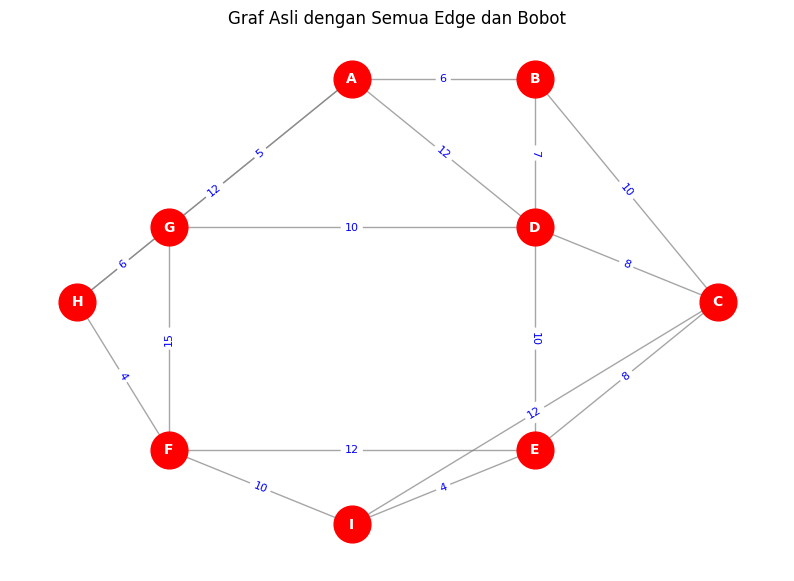

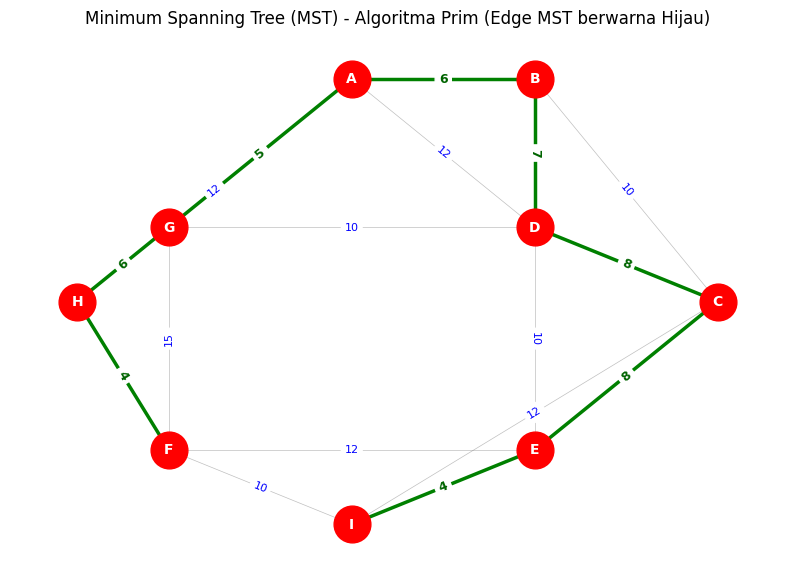

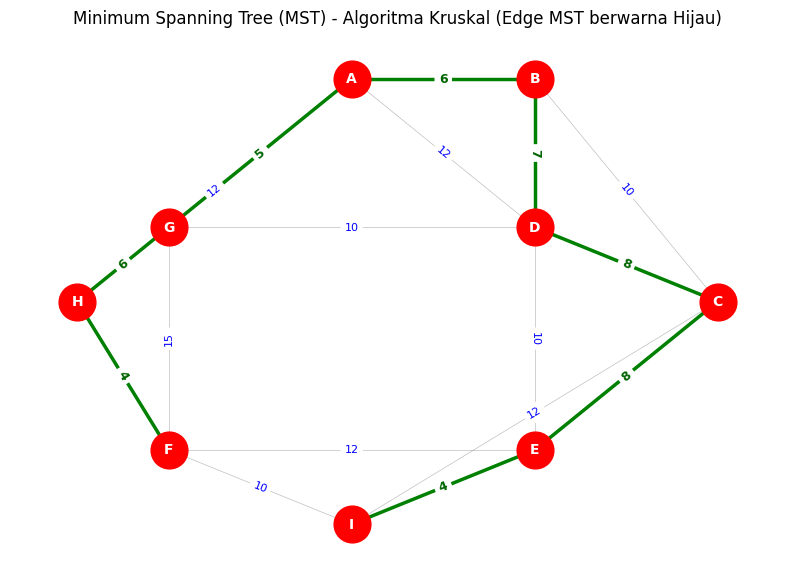

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq # Diperlukan untuk Algoritma Prim

# --- 1. Definisi Graf dan Posisi Node ---

# Daftar semua node
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# Daftar semua edge dengan bobot
all_edges_list = [ # Menggunakan nama berbeda agar tidak bentrok dengan variabel di Kruskal
    ('H', 'F', 4), ('E', 'I', 4), ('G', 'A', 5), ('A', 'B', 6), ('H', 'G', 6),
    ('B', 'D', 7), ('C', 'D', 8), ('C', 'E', 8), ('F', 'I', 10), ('G', 'D', 10),
    ('B', 'C', 10), ('D', 'E', 10), ('H', 'A', 12), ('A', 'D', 12), ('C', 'I', 12),
    ('F', 'E', 12), ('F', 'G', 15)
]

# Buat objek graf networkx untuk visualisasi
G = nx.Graph()
G.add_nodes_from(nodes)

# Tambahkan edge dan bobotnya ke graf networkx
for u, v, weight in all_edges_list:
    G.add_edge(u, v, weight=weight)

# Definisikan posisi node secara manual agar sesuai dengan gambar asli
pos = {
    'A': (3, 5),
    'B': (5, 5),
    'C': (7, 2),
    'D': (5, 3),
    'E': (5, 0),
    'F': (1, 0),
    'G': (1, 3),
    'H': (0, 2),
    'I': (3, -1)
}

# --- 2. Implementasi Algoritma MST (untuk mendapatkan edge MST) ---

# Representasi graf untuk Prim (Adjacency List)
graph_adj_prim = {node: [] for node in nodes}
for u, v, w in all_edges_list:
    graph_adj_prim[u].append((v, w))
    graph_adj_prim[v].append((u, w))

# Algoritma Prim
def prim(graph, start_node, num_nodes):
    mst_edges = []
    visited = set()
    min_heap = [] # (weight, u, v)

    visited.add(start_node)
    for neighbor, weight in graph[start_node]:
        heapq.heappush(min_heap, (weight, start_node, neighbor))

    while min_heap and len(mst_edges) < num_nodes - 1:
        weight, u, v = heapq.heappop(min_heap)

        if v not in visited:
            visited.add(v)
            mst_edges.append((u, v, weight))

            for neighbor, next_weight in graph[v]:
                if neighbor not in visited:
                    heapq.heappush(min_heap, (next_weight, v, neighbor))

    return mst_edges

# Algoritma Kruskal
class DSU:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True
        return False

def kruskal(edges, num_nodes, all_nodes):
    mst_edges = []
    edges.sort(key=lambda x: x[2])
    dsu = DSU(all_nodes)

    for u, v, weight in edges:
        if dsu.union(u, v):
            mst_edges.append((u, v, weight))
            if len(mst_edges) == num_nodes - 1:
                break
    return mst_edges

# Hitung MST menggunakan kedua algoritma
prim_mst_edges = prim(graph_adj_prim, 'H', len(nodes))
kruskal_mst_edges = kruskal(list(all_edges_list), len(nodes), nodes) # Gunakan copy dari all_edges_list


# --- Fungsi Pembantu untuk Visualisasi ---
def draw_graph_with_highlight(graph_obj, node_positions, all_edges, highlighted_edges, title_text):
    plt.figure(figsize=(10, 7))

    # Gambar node
    nx.draw_networkx_nodes(graph_obj, node_positions, node_color='red', node_size=700)
    # Gambar label node
    nx.draw_networkx_labels(graph_obj, node_positions, font_size=10, font_color='white', font_weight='bold')

    # Pisahkan edge yang akan disorot dan yang tidak
    non_highlighted_edges = []
    for u, v, weight in all_edges:
        # Periksa apakah edge ini ada di highlighted_edges (tanpa memperhatikan urutan u,v)
        is_highlighted = False
        for h_u, h_v, h_w in highlighted_edges:
            if (u == h_u and v == h_v) or (u == h_v and v == h_u):
                is_highlighted = True
                break
        if not is_highlighted:
            non_highlighted_edges.append((u, v, weight))

    # Gambar edge yang TIDAK disorot (abu-abu, tipis)
    nx.draw_networkx_edges(graph_obj, node_positions, edgelist=[(u,v) for u,v,w in non_highlighted_edges],
                           width=0.5, alpha=0.5, edge_color='gray')

    # Gambar edge yang DISOROT (hijau, tebal)
    nx.draw_networkx_edges(graph_obj, node_positions, edgelist=[(u,v) for u,v,w in highlighted_edges],
                           width=2.5, alpha=1.0, edge_color='green')

    # Tambahkan label bobot pada setiap edge
    non_highlighted_edge_labels = {(u, v): w for u, v, w in non_highlighted_edges}
    highlighted_edge_labels = {(u, v): w for u, v, w in highlighted_edges}

    nx.draw_networkx_edge_labels(graph_obj, node_positions, edge_labels=non_highlighted_edge_labels,
                                 font_color='blue', font_size=8)
    nx.draw_networkx_edge_labels(graph_obj, node_positions, edge_labels=highlighted_edge_labels,
                                 font_color='darkgreen', font_size=9, font_weight='bold')

    plt.title(title_text)
    plt.axis('off')
    plt.show()


# --- 3. Visualisasi Graf Asli ---
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white', font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=8)
plt.title("Graf Asli dengan Semua Edge dan Bobot")
plt.axis('off')
plt.show()


# --- 4. Visualisasi Minimum Spanning Tree (MST) - Algoritma Prim ---
draw_graph_with_highlight(G, pos, all_edges_list, prim_mst_edges, "Minimum Spanning Tree (MST) - Algoritma Prim (Edge MST berwarna Hijau)")


# --- 5. Visualisasi Minimum Spanning Tree (MST) - Algoritma Kruskal ---
draw_graph_with_highlight(G, pos, all_edges_list, kruskal_mst_edges, "Minimum Spanning Tree (MST) - Algoritma Kruskal (Edge MST berwarna Hijau)")

In [9]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# --- Data Graf ---
# Representasi graf sebagai list of tuples (u, v, weight)
# Ini adalah semua edge yang Anda identifikasi
edges_data = [
    ('H', 'F', 4), ('H', 'A', 12), ('H', 'G', 6), ('H', 'D', 15),
    ('A', 'G', 5), ('A', 'B', 6),
    ('G', 'D', 10),
    ('F', 'E', 12), ('F', 'I', 10),
    ('B', 'D', 7), ('B', 'C', 10),
    ('D', 'E', 10), ('D', 'C', 8),
    ('E', 'I', 4), ('E', 'C', 8),
    ('C', 'I', 12)
]

# Buat objek graf dari networkx
G = nx.Graph()
G.add_weighted_edges_from(edges_data)

# --- Algoritma Prim ---
def prim_mst(graph, start_node):
    mst_edges = []
    total_weight = 0

    # Priority queue untuk menyimpan (weight, u, v) dari edge yang akan dipertimbangkan
    # heapq min-heap akan mengambil edge dengan bobot terkecil
    min_heap = []

    # Set untuk melacak node yang sudah termasuk dalam MST
    visited = set()

    # Mulai dari node awal
    visited.add(start_node)

    # Tambahkan semua edge yang terhubung ke start_node ke min_heap
    for neighbor, attrs in graph[start_node].items():
        heapq.heappush(min_heap, (attrs['weight'], start_node, neighbor))

    while min_heap and len(visited) < len(graph.nodes):
        weight, u, v = heapq.heappop(min_heap)

        # Jika node 'v' sudah dikunjungi, abaikan edge ini (akan membentuk siklus jika ditambahkan lagi)
        if v in visited:
            continue

        # Node 'v' belum dikunjungi, tambahkan ke MST
        visited.add(v)
        mst_edges.append((u, v, weight))
        total_weight += weight

        # Tambahkan semua edge dari node 'v' ke min_heap
        for neighbor_of_v, attrs_of_v in graph[v].items():
            if neighbor_of_v not in visited:
                heapq.heappush(min_heap, (attrs_of_v['weight'], v, neighbor_of_v))

    return mst_edges, total_weight

print("--- Algoritma Prim ---")
start_node_prim = 'H'
prim_mst_edges, prim_total_weight = prim_mst(G, start_node_prim)
print(f"MST Edges (Prim): {prim_mst_edges}")
print(f"Total Bobot MST (Prim): {prim_total_weight}")
print("-" * 30)

# --- Algoritma Kruskal ---
class DisjointSet:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True # Berhasil digabung
        return False # Sudah di himpunan yang sama (membentuk siklus)

def kruskal_mst(graph):
    mst_edges = []
    total_weight = 0

    # 1. Buat list semua edge dan urutkan berdasarkan bobot
    all_edges = []
    for u, v, attrs in graph.edges(data=True):
        all_edges.append((attrs['weight'], u, v))
    all_edges.sort() # Mengurutkan berdasarkan elemen pertama (bobot)

    # 2. Inisialisasi Disjoint Set untuk semua node
    nodes = list(graph.nodes())
    ds = DisjointSet(nodes)

    # 3. Iterasi melalui edge yang sudah diurutkan
    for weight, u, v in all_edges:
        if ds.union(u, v): # Jika berhasil digabung (tidak membentuk siklus)
            mst_edges.append((u, v, weight))
            total_weight += weight
            # Jika sudah N-1 edge, MST sudah lengkap
            if len(mst_edges) == len(graph.nodes) - 1:
                break

    return mst_edges, total_weight

print("--- Algoritma Kruskal ---")
kruskal_mst_edges, kruskal_total_weight = kruskal_mst(G)
print(f"MST Edges (Kruskal): {kruskal_mst_edges}")
print(f"Total Bobot MST (Kruskal): {kruskal_total_weight}")
print("-" * 30)

--- Algoritma Prim ---
MST Edges (Prim): [('H', 'F', 4), ('H', 'G', 6), ('G', 'A', 5), ('A', 'B', 6), ('B', 'D', 7), ('D', 'C', 8), ('C', 'E', 8), ('E', 'I', 4)]
Total Bobot MST (Prim): 48
------------------------------
--- Algoritma Kruskal ---
MST Edges (Kruskal): [('E', 'I', 4), ('H', 'F', 4), ('A', 'G', 5), ('A', 'B', 6), ('H', 'G', 6), ('D', 'B', 7), ('D', 'C', 8), ('E', 'C', 8)]
Total Bobot MST (Kruskal): 48
------------------------------


--- Data Graf Teridentifikasi ---
(H, F, 4)
(H, A, 12)
(H, G, 6)
(H, D, 15)
(F, E, 12)
(F, I, 10)
(A, G, 5)
(A, B, 6)
(G, D, 10)
(D, B, 7)
(D, E, 10)
(D, C, 8)
(B, C, 10)
(E, I, 4)
(E, C, 8)
(I, C, 12)
------------------------------
--- Hasil Algoritma Prim ---
MST Edges (Prim): [('H', 'F', 4), ('H', 'G', 6), ('G', 'A', 5), ('A', 'B', 6), ('B', 'D', 7), ('D', 'C', 8), ('C', 'E', 8), ('E', 'I', 4)]
Total Bobot MST (Prim): 48
------------------------------
--- Hasil Algoritma Kruskal ---
MST Edges (Kruskal): [('E', 'I', 4), ('H', 'F', 4), ('A', 'G', 5), ('A', 'B', 6), ('H', 'G', 6), ('D', 'B', 7), ('D', 'C', 8), ('E', 'C', 8)]
Total Bobot MST (Kruskal): 48
------------------------------


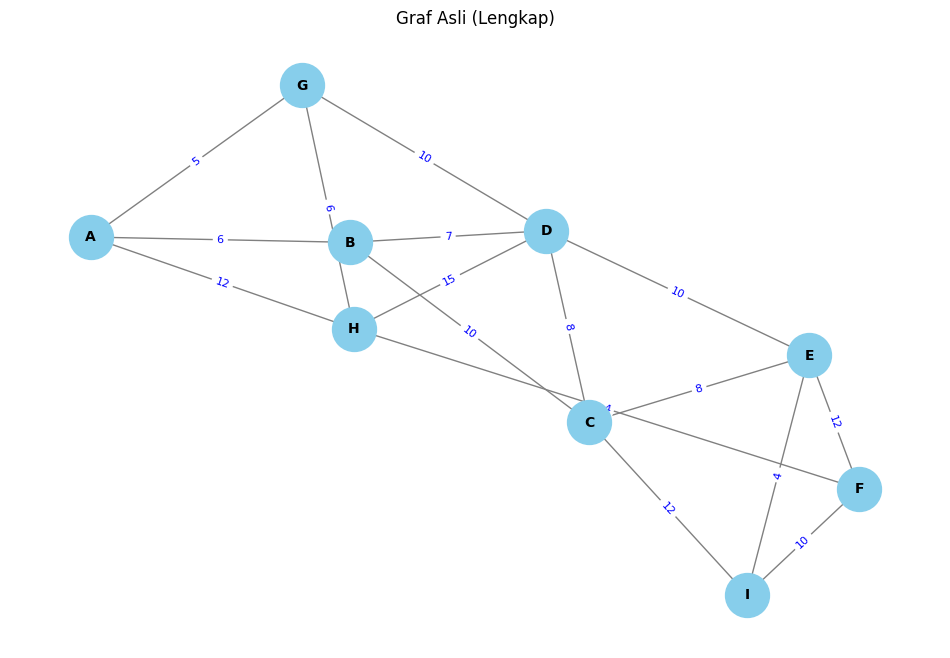

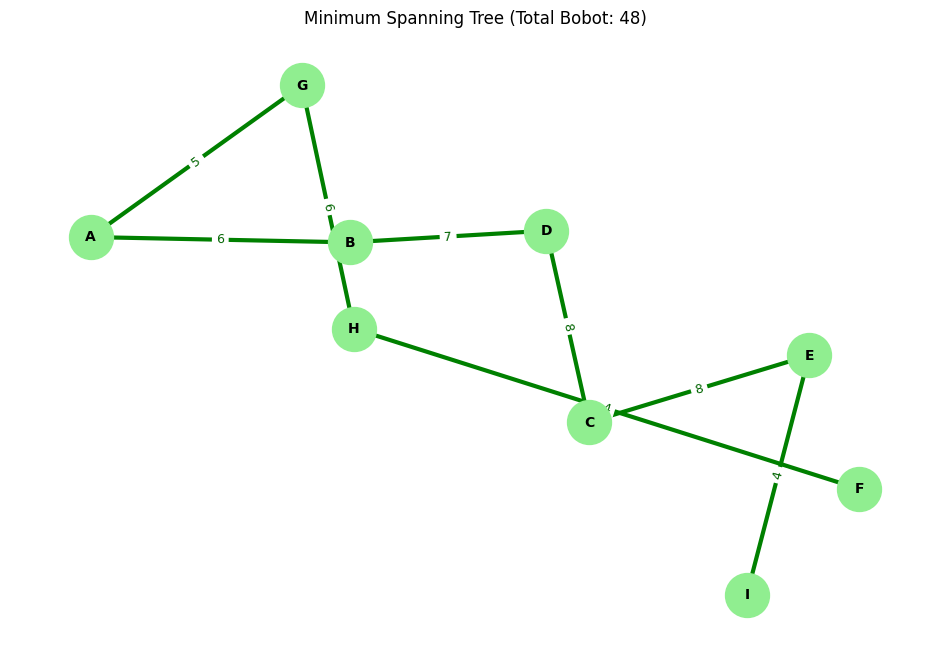

In [12]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Data Graf Asli ---
# Representasi graf sebagai list of tuples (u, v, weight)
edges_data = [
    ('H', 'F', 4), ('H', 'A', 12), ('H', 'G', 6), ('H', 'D', 15),
    ('A', 'G', 5), ('A', 'B', 6),
    ('G', 'D', 10),
    ('F', 'E', 12), ('F', 'I', 10),
    ('B', 'D', 7), ('B', 'C', 10),
    ('D', 'E', 10), ('D', 'C', 8),
    ('E', 'I', 4), ('E', 'C', 8),
    ('C', 'I', 12)
]

# Buat objek graf networkx untuk graf asli
G_original = nx.Graph()
G_original.add_weighted_edges_from(edges_data)

print("--- Data Graf Teridentifikasi ---")
for u, v, w in G_original.edges(data='weight'):
    print(f"({u}, {v}, {w})")
print("-" * 30)

# --- 2. Implementasi Algoritma MST ---

# --- 2.1 Algoritma Prim ---
def prim_mst(graph, start_node):
    mst_edges = []
    total_weight = 0
    min_heap = []
    visited = set()

    visited.add(start_node)
    for neighbor, attrs in graph[start_node].items():
        heapq.heappush(min_heap, (attrs['weight'], start_node, neighbor))

    while min_heap and len(visited) < len(graph.nodes):
        weight, u, v = heapq.heappop(min_heap)

        if v in visited:
            continue

        visited.add(v)
        mst_edges.append((u, v, weight))
        total_weight += weight

        for neighbor_of_v, attrs_of_v in graph[v].items():
            if neighbor_of_v not in visited:
                heapq.heappush(min_heap, (attrs_of_v['weight'], v, neighbor_of_v))

    return mst_edges, total_weight

print("--- Hasil Algoritma Prim ---")
start_node_prim = 'H'
prim_mst_edges, prim_total_weight = prim_mst(G_original, start_node_prim)
print(f"MST Edges (Prim): {prim_mst_edges}")
print(f"Total Bobot MST (Prim): {prim_total_weight}")
print("-" * 30)

# --- 2.2 Algoritma Kruskal ---
class DisjointSet:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True
        return False

def kruskal_mst(graph):
    mst_edges = []
    total_weight = 0

    all_edges = []
    for u, v, attrs in graph.edges(data=True):
        all_edges.append((attrs['weight'], u, v))
    all_edges.sort()

    nodes = list(graph.nodes())
    ds = DisjointSet(nodes)

    for weight, u, v in all_edges:
        if ds.union(u, v):
            mst_edges.append((u, v, weight))
            total_weight += weight
            if len(mst_edges) == len(graph.nodes) - 1:
                break

    return mst_edges, total_weight

print("--- Hasil Algoritma Kruskal ---")
kruskal_mst_edges, kruskal_total_weight = kruskal_mst(G_original)
print(f"MST Edges (Kruskal): {kruskal_mst_edges}")
print(f"Total Bobot MST (Kruskal): {kruskal_total_weight}")
print("-" * 30)

# --- 3. Visualisasi Graf ---

# Kita akan menggunakan hasil Kruskal untuk visualisasi MST,
# karena Prim dan Kruskal menghasilkan MST yang sama (bobot dan edge setnya)
# Jika ada multiple MST dengan bobot yang sama, edge setnya mungkin berbeda,
# tapi total bobotnya akan selalu sama.

# Posisi node untuk konsistensi visualisasi
pos = nx.spring_layout(G_original, seed=42)

# --- 3.1 Visualisasi Graf Asli (Lengkap) ---
plt.figure(figsize=(12, 8))
plt.title("Graf Asli (Lengkap)")

# Gambar semua node
nx.draw_networkx_nodes(G_original, pos, node_color='skyblue', node_size=1000)

# Gambar semua edge dengan warna abu-abu
nx.draw_networkx_edges(G_original, pos, edge_color='gray', width=1)

# Tambahkan label node
nx.draw_networkx_labels(G_original, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada semua edge
edge_labels_original = nx.get_edge_attributes(G_original, 'weight')
nx.draw_networkx_edge_labels(G_original, pos, edge_labels=edge_labels_original, font_color='blue', font_size=8)

plt.axis('off')
plt.show()


# --- 3.2 Visualisasi Graf Penyelesaian MST (Hanya Edge MST) ---
plt.figure(figsize=(12, 8))
plt.title(f"Minimum Spanning Tree (Total Bobot: {kruskal_total_weight})")

# Buat graf baru hanya dengan edge MST
G_mst = nx.Graph()
G_mst.add_weighted_edges_from(kruskal_mst_edges) # Menggunakan hasil dari Kruskal

# Gambar semua node (gunakan posisi yang sama seperti graf asli)
nx.draw_networkx_nodes(G_mst, pos, node_color='lightgreen', node_size=1000)

# Gambar edge MST dengan warna hijau yang lebih tebal
nx.draw_networkx_edges(G_mst, pos, edge_color='green', width=3)

# Tambahkan label node
nx.draw_networkx_labels(G_mst, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada edge MST
edge_labels_mst = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=edge_labels_mst, font_color='darkgreen', font_size=9)

plt.axis('off')
plt.show()

--- Data Graf Teridentifikasi ---
(H, F, 4)
(H, A, 12)
(H, G, 6)
(H, D, 15)
(F, E, 12)
(F, I, 10)
(A, G, 5)
(A, B, 6)
(G, D, 10)
(D, B, 7)
(D, E, 10)
(D, C, 8)
(B, C, 10)
(E, I, 4)
(E, C, 8)
(I, C, 12)
------------------------------

--- Algoritma Prim (Langkah-langkah Detil) ---
Inisialisasi:
  Set Kunjungan = {H}
  MST Edges = {}
  Total Bobot MST = 0

Iterasi 1:
  Edge yang tersedia dari {'H'} ke node belum dikunjungi:
    (H, A - 12), (H, D - 15), (H, F - 4), (H, G - 6)
  Pilih edge terkecil: (H, F) dengan bobot 4.
  MST Edges = {('H', 'F')}
  Set Kunjungan = {F, H}
  Total Bobot MST = 4

Iterasi 2:
  Edge yang tersedia dari {'F', 'H'} ke node belum dikunjungi:
    (F, E - 12), (F, I - 10), (H, A - 12), (H, D - 15), (H, G - 6)
  Pilih edge terkecil: (H, G) dengan bobot 6.
  MST Edges = {('H', 'F'), ('H', 'G')}
  Set Kunjungan = {F, G, H}
  Total Bobot MST = 10

Iterasi 3:
  Edge yang tersedia dari {'F', 'H', 'G'} ke node belum dikunjungi:
    (F, E - 12), (F, I - 10), (G, A - 5), (

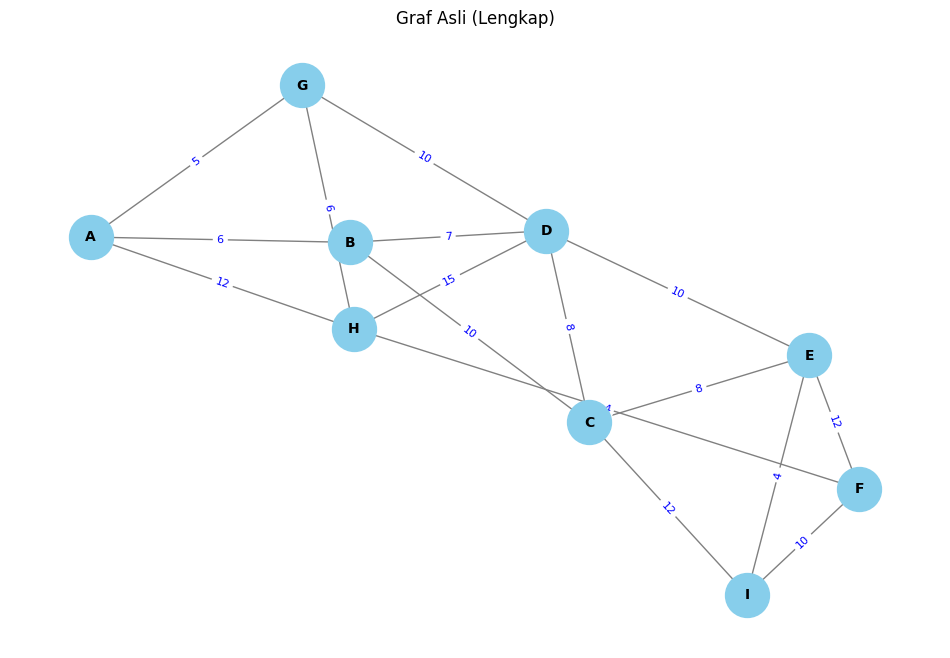

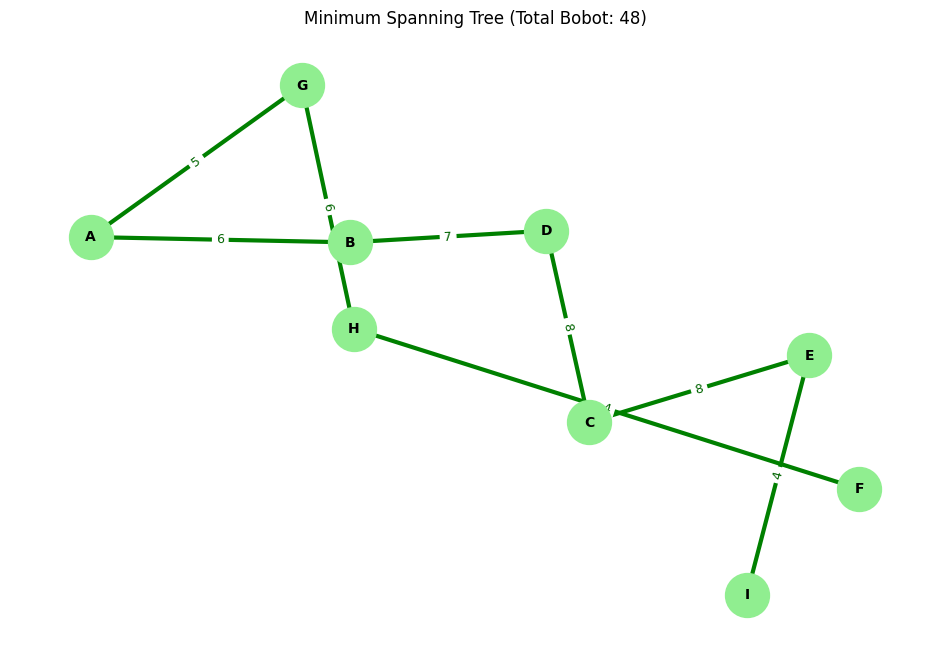

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Data Graf Asli ---
edges_data = [
    ('H', 'F', 4), ('H', 'A', 12), ('H', 'G', 6), ('H', 'D', 15),
    ('A', 'G', 5), ('A', 'B', 6),
    ('G', 'D', 10),
    ('F', 'E', 12), ('F', 'I', 10),
    ('B', 'D', 7), ('B', 'C', 10),
    ('D', 'E', 10), ('D', 'C', 8),
    ('E', 'I', 4), ('E', 'C', 8),
    ('C', 'I', 12)
]

G_original = nx.Graph()
G_original.add_weighted_edges_from(edges_data)

print("--- Data Graf Teridentifikasi ---")
for u, v, w in G_original.edges(data='weight'):
    print(f"({u}, {v}, {w})")
print("-" * 30)

# --- 2. Implementasi Algoritma MST dengan Langkah-langkah Iterasi Dicetak ---

# --- 2.1 Algoritma Prim ---
def prim_mst_detailed(graph, start_node):
    mst_edges = []
    total_weight = 0
    min_heap = []
    visited = set()

    print("\n--- Algoritma Prim (Langkah-langkah Detil) ---")
    print("Inisialisasi:")
    print(f"  Set Kunjungan = {{{start_node}}}")
    print("  MST Edges = {}")
    print("  Total Bobot MST = 0")

    visited.add(start_node)

    # Initialize heap with edges from the start_node
    for neighbor, attrs in graph[start_node].items():
        heapq.heappush(min_heap, (attrs['weight'], start_node, neighbor))

    # Track current edges in consideration for printout
    current_edges_in_consideration = set()
    for w, u, v in min_heap:
        current_edges_in_consideration.add(f"({u}, {v} - {w})")

    iter_count = 0
    while min_heap and len(visited) < len(graph.nodes):
        iter_count += 1
        print(f"\nIterasi {iter_count}:")

        # Display edges currently available from visited nodes
        print(f"  Edge yang tersedia dari {visited} ke node belum dikunjungi:")
        temp_edges_display = []
        for v_node in visited:
            for neighbor, attrs in graph[v_node].items():
                if neighbor not in visited:
                    temp_edges_display.append(f"({v_node}, {neighbor} - {attrs['weight']})")
        print(f"    {', '.join(sorted(list(set(temp_edges_display)))) if temp_edges_display else 'Tidak ada edge baru yang valid'}")

        weight, u, v = heapq.heappop(min_heap)

        while v in visited and min_heap: # Skip if already visited and take next smallest
            weight, u, v = heapq.heappop(min_heap)

        if v in visited: # If after popping, it's still visited (e.g. min_heap empty or all remaining are visited)
            print("    Semua edge yang tersisa mengarah ke node yang sudah dikunjungi atau tidak ada edge valid.")
            break

        print(f"  Pilih edge terkecil: ({u}, {v}) dengan bobot {weight}.")
        visited.add(v)
        mst_edges.append((u, v, weight))
        total_weight += weight

        print(f"  MST Edges = {{{', '.join(str((e[0], e[1])) for e in mst_edges)}}}")
        print(f"  Set Kunjungan = {{{', '.join(sorted(list(visited)))}}}")
        print(f"  Total Bobot MST = {total_weight}")

        # Add new edges from the newly visited node to the min_heap
        for neighbor_of_v, attrs_of_v in graph[v].items():
            if neighbor_of_v not in visited:
                heapq.heappush(min_heap, (attrs_of_v['weight'], v, neighbor_of_v))

    print("\nHasil Algoritma Prim:")
    print(f"MST Edges: {mst_edges}")
    print(f"Total Bobot Minimum Spanning Tree: {total_weight}")
    print("-" * 30)
    return mst_edges, total_weight

prim_mst_edges, prim_total_weight = prim_mst_detailed(G_original, 'H')

# --- 2.2 Algoritma Kruskal ---
class DisjointSet:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}
        # For printing purposes, track current sets
        self.sets = {node: {node} for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            # Update sets for printing
            temp_set_i = self.sets.pop(root_i)
            temp_set_j = self.sets.pop(root_j)

            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
                self.sets[root_j] = temp_set_i.union(temp_set_j)
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
                self.sets[root_i] = temp_set_i.union(temp_set_j)
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
                self.sets[root_i] = temp_set_i.union(temp_set_j)
            return True
        return False

    def get_current_sets(self):
        # Ensure all sets are up-to-date after path compression
        for node in self.parent:
            self.find(node)

        grouped_sets = {}
        for node in self.parent:
            root = self.parent[node]
            if root not in grouped_sets:
                grouped_sets[root] = []
            grouped_sets[root].append(node)

        return [sorted(s) for s in grouped_sets.values()]


def kruskal_mst_detailed(graph):
    mst_edges = []
    total_weight = 0

    all_edges = []
    for u, v, attrs in graph.edges(data=True):
        all_edges.append((attrs['weight'], u, v))
    all_edges.sort()

    nodes = list(graph.nodes())
    ds = DisjointSet(nodes)

    print("\n--- Algoritma Kruskal (Langkah-langkah Detil) ---")
    print("Inisialisasi:")
    print("  Urutan Edge (bobot, u, v):")
    for w, u, v in all_edges:
        print(f"    ({u}, {v}): {w}")
    print(f"  Setiap node awalnya adalah himpunan terpisah: {[sorted(set_item) for set_item in ds.get_current_sets()]}")
    print("  MST Edges = {}")
    print("  Total Bobot MST = 0")

    edge_index = 0
    while len(mst_edges) < len(graph.nodes) - 1 and edge_index < len(all_edges):
        weight, u, v = all_edges[edge_index]
        edge_index += 1

        print(f"\nProses Edge: ({u}, {v}) dengan Bobot {weight}")

        root_u = ds.find(u)
        root_v = ds.find(v)

        if root_u != root_v: # If they are not in the same set (no cycle)
            print(f"  Node {u} (di himpunan {sorted(ds.sets[root_u])}) dan Node {v} (di himpunan {sorted(ds.sets[root_v])}) berada di himpunan berbeda. Tambahkan.")
            ds.union(u, v)
            mst_edges.append((u, v, weight))
            total_weight += weight
            print(f"  Union({u}, {v}) -> Himpunan sekarang: {ds.get_current_sets()}")
            print(f"  MST Edges = {{{', '.join(str((e[0], e[1])) for e in mst_edges)}}}")
            print(f"  Total Bobot = {total_weight}")
        else: # If they are in the same set (cycle detected)
            print(f"  Node {u} dan {v} sudah berada di himpunan yang sama ({sorted(ds.sets[root_u])}).")
            print(f"  Menambahkan edge ini akan membentuk siklus. Abaikan ({u}, {v}).")

    print("\nHasil Algoritma Kruskal:")
    print(f"MST Edges: {mst_edges}")
    print(f"Total Bobot Minimum Spanning Tree: {total_weight}")
    print("-" * 30)
    return mst_edges, total_weight

kruskal_mst_edges, kruskal_total_weight = kruskal_mst_detailed(G_original)

# --- 3. Visualisasi Graf ---

# Kita akan menggunakan hasil Kruskal untuk visualisasi MST,
# karena Prim dan Kruskal menghasilkan MST yang sama (bobot dan edge setnya)

# Posisi node untuk konsistensi visualisasi
pos = nx.spring_layout(G_original, seed=42)

# --- 3.1 Visualisasi Graf Asli (Lengkap) ---
plt.figure(figsize=(12, 8))
plt.title("Graf Asli (Lengkap)")

# Gambar semua node
nx.draw_networkx_nodes(G_original, pos, node_color='skyblue', node_size=1000)

# Gambar semua edge dengan warna abu-abu
nx.draw_networkx_edges(G_original, pos, edge_color='gray', width=1)

# Tambahkan label node
nx.draw_networkx_labels(G_original, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada semua edge
edge_labels_original = nx.get_edge_attributes(G_original, 'weight')
nx.draw_networkx_edge_labels(G_original, pos, edge_labels=edge_labels_original, font_color='blue', font_size=8)

plt.axis('off')
plt.show()

# --- 3.2 Visualisasi Graf Penyelesaian MST (Hanya Edge MST) ---
plt.figure(figsize=(12, 8))
plt.title(f"Minimum Spanning Tree (Total Bobot: {kruskal_total_weight})")

# Buat graf baru hanya dengan edge MST
G_mst = nx.Graph()
G_mst.add_weighted_edges_from(kruskal_mst_edges) # Menggunakan hasil dari Kruskal

# Gambar semua node (gunakan posisi yang sama seperti graf asli)
nx.draw_networkx_nodes(G_mst, pos, node_color='lightgreen', node_size=1000)

# Gambar edge MST dengan warna hijau yang lebih tebal
nx.draw_networkx_edges(G_mst, pos, edge_color='green', width=3)

# Tambahkan label node
nx.draw_networkx_labels(G_mst, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada edge MST
edge_labels_mst = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=edge_labels_mst, font_color='darkgreen', font_size=9)

plt.axis('off')
plt.show()

NAMA: INTIFADA ADE KARTIKA
NIM: 23533756
KELAS: 4C/TEKNIK INFORMATIKA
------------------------------
ALGIS LATIHAN PERTEMUAN 12
Minimum Spanning Tree
------------------------------

--- Data Graf Teridentifikasi ---
(H, F, 4)
(H, A, 12)
(H, G, 6)
(H, D, 15)
(F, E, 12)
(F, I, 10)
(A, G, 5)
(A, B, 6)
(G, D, 10)
(D, B, 7)
(D, E, 10)
(D, C, 8)
(B, C, 10)
(E, I, 4)
(E, C, 8)
(I, C, 12)
------------------------------

--- Algoritma Prim (Langkah-langkah Detil) ---
Inisialisasi:
  Set Kunjungan = {H}
  MST Edges = {}
  Total Bobot MST = 0

Iterasi 1:
  Edge yang tersedia dari {'H'} ke node belum dikunjungi:
    (H, A - 12), (H, D - 15), (H, F - 4), (H, G - 6)
  Pilih edge terkecil: (H, F) dengan bobot 4.
  MST Edges = {('H', 'F')}
  Set Kunjungan = {F, H}
  Total Bobot MST = 4

Iterasi 2:
  Edge yang tersedia dari {'F', 'H'} ke node belum dikunjungi:
    (F, E - 12), (F, I - 10), (H, A - 12), (H, D - 15), (H, G - 6)
  Pilih edge terkecil: (H, G) dengan bobot 6.
  MST Edges = {('H', 'F'), ('H'

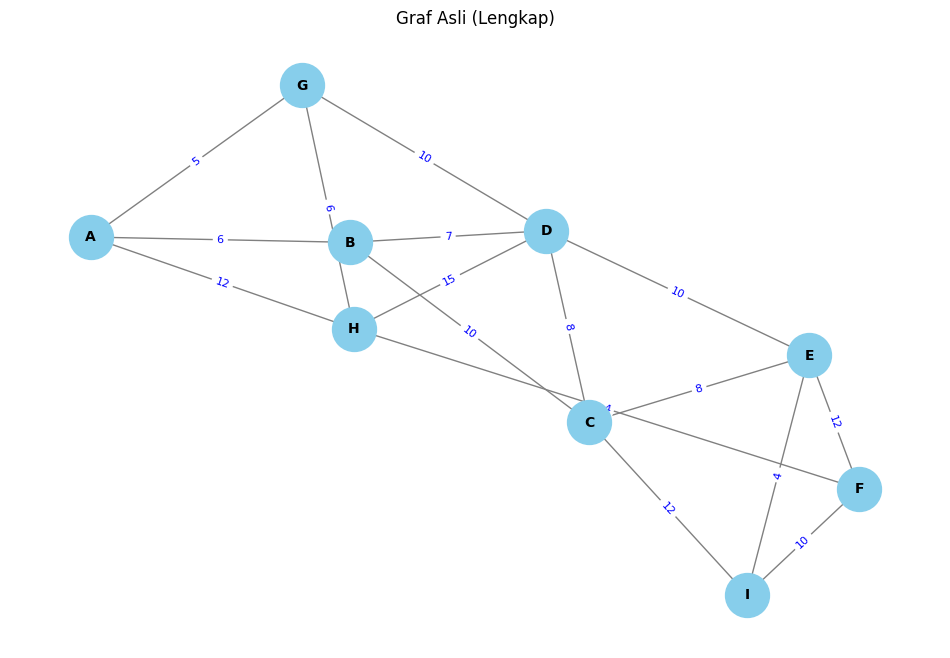

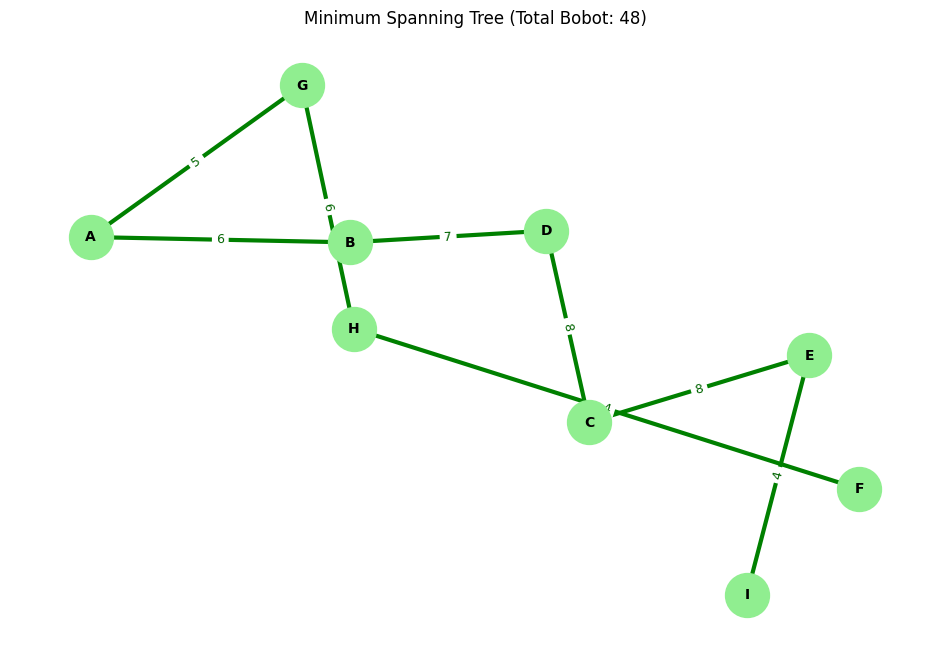

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# --- Informasi Mahasiswa ---
print("NAMA: INTIFADA ADE KARTIKA")
print("NIM: 23533756")
print("KELAS: 4C/TEKNIK INFORMATIKA")
print("-" * 30)

# --- Judul Latihan ---
print("ALGIS LATIHAN PERTEMUAN 12")
print("Minimum Spanning Tree")
print("-" * 30)

# --- 1. Data Graf Asli ---
edges_data = [
    ('H', 'F', 4), ('H', 'A', 12), ('H', 'G', 6), ('H', 'D', 15),
    ('A', 'G', 5), ('A', 'B', 6),
    ('G', 'D', 10),
    ('F', 'E', 12), ('F', 'I', 10),
    ('B', 'D', 7), ('B', 'C', 10),
    ('D', 'E', 10), ('D', 'C', 8),
    ('E', 'I', 4), ('E', 'C', 8),
    ('C', 'I', 12)
]

G_original = nx.Graph()
G_original.add_weighted_edges_from(edges_data)

print("\n--- Data Graf Teridentifikasi ---")
for u, v, w in G_original.edges(data='weight'):
    print(f"({u}, {v}, {w})")
print("-" * 30)

# --- 2. Implementasi Algoritma MST dengan Langkah-langkah Iterasi Dicetak ---

# --- 2.1 Algoritma Prim ---
def prim_mst_detailed(graph, start_node):
    mst_edges = []
    total_weight = 0
    min_heap = []
    visited = set()

    print("\n--- Algoritma Prim (Langkah-langkah Detil) ---")
    print("Inisialisasi:")
    print(f"  Set Kunjungan = {{{start_node}}}")
    print("  MST Edges = {}")
    print("  Total Bobot MST = 0")

    visited.add(start_node)

    # Initialize heap with edges from the start_node
    for neighbor, attrs in graph[start_node].items():
        heapq.heappush(min_heap, (attrs['weight'], start_node, neighbor))

    iter_count = 0
    while min_heap and len(visited) < len(graph.nodes):
        iter_count += 1
        print(f"\nIterasi {iter_count}:")

        # Display edges currently available from visited nodes
        print(f"  Edge yang tersedia dari {visited} ke node belum dikunjungi:")
        temp_edges_display = []
        # Untuk mendapatkan list edge yang valid dari heap
        current_heap_edges = []
        for w, u_heap, v_heap in min_heap:
            if v_heap not in visited:
                current_heap_edges.append(f"({u_heap}, {v_heap} - {w})")
        print(f"    {', '.join(sorted(list(set(current_heap_edges)))) if current_heap_edges else 'Tidak ada edge baru yang valid'}")

        weight, u, v = heapq.heappop(min_heap)

        # This loop correctly handles cases where popped edge leads to already visited node
        while v in visited and min_heap:
            weight, u, v = heapq.heappop(min_heap)

        if v in visited and not min_heap: # If after final pop, it's visited and no more edges
            print("    Semua edge yang tersisa mengarah ke node yang sudah dikunjungi atau tidak ada edge valid.")
            break
        elif v in visited: # This means a valid edge was already processed, and this one is redundant
            continue

        print(f"  Pilih edge terkecil: ({u}, {v}) dengan bobot {weight}.")
        visited.add(v)
        mst_edges.append((u, v, weight))
        total_weight += weight

        print(f"  MST Edges = {{{', '.join(str((e[0], e[1])) for e in mst_edges)}}}")
        print(f"  Set Kunjungan = {{{', '.join(sorted(list(visited)))}}}")
        print(f"  Total Bobot MST = {total_weight}")

        # Add new edges from the newly visited node to the min_heap
        for neighbor_of_v, attrs_of_v in graph[v].items():
            if neighbor_of_v not in visited:
                heapq.heappush(min_heap, (attrs_of_v['weight'], v, neighbor_of_v))

    print("\nHasil Algoritma Prim:")
    print(f"MST Edges: {mst_edges}")
    print(f"Total Bobot Minimum Spanning Tree: {total_weight}")
    print("-" * 30)
    return mst_edges, total_weight

prim_mst_edges, prim_total_weight = prim_mst_detailed(G_original, 'H')

# --- 2.2 Algoritma Kruskal ---
class DisjointSet:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)

        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True
        return False

    def get_current_sets(self, nodes):
        # A utility to represent current disjoint sets for printing
        # This is a bit complex for a simple print, but attempts to show current groups
        roots = {self.find(node) for node in nodes}
        grouped_sets = {root: [] for root in roots}
        for node in nodes:
            grouped_sets[self.find(node)].append(node)
        return [sorted(s) for s in grouped_sets.values()]


def kruskal_mst_detailed(graph):
    mst_edges = []
    total_weight = 0

    all_edges = []
    for u, v, attrs in graph.edges(data=True):
        all_edges.append((attrs['weight'], u, v))
    all_edges.sort()

    nodes = list(graph.nodes())
    ds = DisjointSet(nodes)

    print("\n--- Algoritma Kruskal (Langkah-langkah Detil) ---")
    print("Inisialisasi:")
    print("  Urutan Edge (bobot, u, v):")
    for w, u, v in all_edges:
        print(f"    ({u}, {v}): {w}")
    print(f"  Setiap node awalnya adalah himpunan terpisah: {[sorted(set_item) for set_item in ds.get_current_sets(nodes)]}")
    print("  MST Edges = {}")
    print("  Total Bobot MST = 0")

    edge_index = 0
    while len(mst_edges) < len(graph.nodes) - 1 and edge_index < len(all_edges):
        weight, u, v = all_edges[edge_index]
        edge_index += 1

        print(f"\nProses Edge: ({u}, {v}) dengan Bobot {weight}")

        root_u = ds.find(u)
        root_v = ds.find(v)

        if root_u != root_v: # If they are not in the same set (no cycle)
            # Find the actual set content for printing, handling cases where nodes might not be directly in 'nodes' list order
            set_u_content = None
            set_v_content = None
            current_ds_sets = ds.get_current_sets(nodes)
            for s in current_ds_sets:
                if u in s:
                    set_u_content = s
                if v in s:
                    set_v_content = s

            print(f"  Node {u} (di himpunan {sorted(set_u_content)}) dan Node {v} (di himpunan {sorted(set_v_content)}) berada di himpunan berbeda. Tambahkan.")
            ds.union(u, v)
            mst_edges.append((u, v, weight))
            total_weight += weight
            print(f"  Union({u}, {v}) -> Himpunan sekarang: {ds.get_current_sets(nodes)}")
            print(f"  MST Edges = {{{', '.join(str((e[0], e[1])) for e in mst_edges)}}}")
            print(f"  Total Bobot = {total_weight}")
        else: # If they are in the same set (cycle detected)
            set_u_content = None
            current_ds_sets = ds.get_current_sets(nodes)
            for s in current_ds_sets:
                if u in s:
                    set_u_content = s
                    break
            print(f"  Node {u} dan {v} sudah berada di himpunan yang sama ({sorted(set_u_content)}).")
            print(f"  Menambahkan edge ini akan membentuk siklus. Abaikan ({u}, {v}).")

    print("\nHasil Algoritma Kruskal:")
    print(f"MST Edges: {mst_edges}")
    print(f"Total Bobot Minimum Spanning Tree: {total_weight}")
    print("-" * 30)
    return mst_edges, total_weight

kruskal_mst_edges, kruskal_total_weight = kruskal_mst_detailed(G_original)

# --- 3. Visualisasi Graf ---

# Kita akan menggunakan hasil Kruskal untuk visualisasi MST,
# karena Prim dan Kruskal menghasilkan MST yang sama (bobot dan edge setnya)

# Posisi node untuk konsistensi visualisasi
pos = nx.spring_layout(G_original, seed=42)

# --- 3.1 Visualisasi Graf Asli (Lengkap) ---
plt.figure(figsize=(12, 8))
plt.title("Graf Asli (Lengkap)")

# Gambar semua node
nx.draw_networkx_nodes(G_original, pos, node_color='skyblue', node_size=1000)

# Gambar semua edge dengan warna abu-abu
nx.draw_networkx_edges(G_original, pos, edge_color='gray', width=1)

# Tambahkan label node
nx.draw_networkx_labels(G_original, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada semua edge
edge_labels_original = nx.get_edge_attributes(G_original, 'weight')
nx.draw_networkx_edge_labels(G_original, pos, edge_labels=edge_labels_original, font_color='blue', font_size=8)

plt.axis('off')
plt.show()

# --- 3.2 Visualisasi Graf Penyelesaian MST (Hanya Edge MST) ---
plt.figure(figsize=(12, 8))
plt.title(f"Minimum Spanning Tree (Total Bobot: {kruskal_total_weight})")

# Buat graf baru hanya dengan edge MST
G_mst = nx.Graph()
G_mst.add_weighted_edges_from(kruskal_mst_edges) # Menggunakan hasil dari Kruskal

# Gambar semua node (gunakan posisi yang sama seperti graf asli)
nx.draw_networkx_nodes(G_mst, pos, node_color='lightgreen', node_size=1000)

# Gambar edge MST dengan warna hijau yang lebih tebal
nx.draw_networkx_edges(G_mst, pos, edge_color='green', width=3)

# Tambahkan label node
nx.draw_networkx_labels(G_mst, pos, font_size=10, font_weight='bold', font_color='black')

# Tambahkan label bobot pada edge MST
edge_labels_mst = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=edge_labels_mst, font_color='darkgreen', font_size=9)

plt.axis('off')
plt.show()